In [2]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import torch
import seaborn as sns
from opacus.accountants.rdp import RDPAccountant

import wilds
from wilds.common.grouper import CombinatorialGrouper


sns.set_style("whitegrid")

plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r"""
\usepackage{sansmath}
\sansmath
""" #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here

fontsize = 15

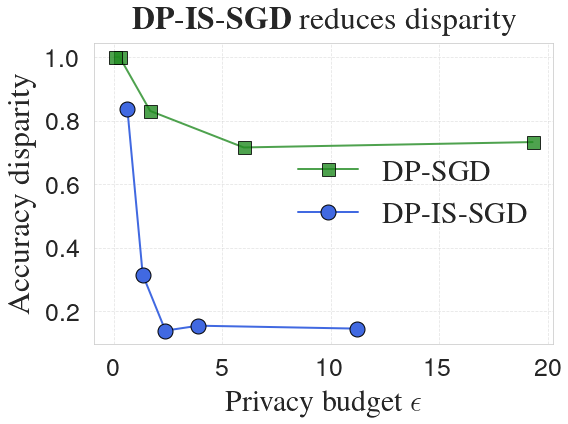

In [111]:
ds_name = "celebA"
#ds_name = "utkface"
#ds_name = "inaturalist"

res = joblib.load(f"./data/disparity_{ds_name}.pkl")
eps, weps = res['eps'], res['weps']
tst_disparity = res['tst disparity']
tst_disparity_dpiw = res['tst disparity dpiw']


ticks_ = [-1, 1, 3, 6, 10, 15, 20]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams.update({
  "text.usetex": True,
  "font.serif" : "times",
  "font.family": "serif"
})

plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

plt.plot(eps, tst_disparity,
                 ls='-',
                 linewidth=2.0,
                 alpha=0.8,
                 color ='forestgreen',
                 mec='k',
                 mew=1.0,
                 markersize=13,
                 marker='s',
                 label="DP-SGD")
plt.plot(weps, tst_disparity_dpiw,
                 ls='-',
                 linewidth=2.0,
                 color ='royalblue',
                 mec='k',
                 mew=1.0,
                 markersize=15,
                 marker='o',
                 label="DP-IS-SGD")


#plt.xscale("log")
#plt.xticks(fontsize=fontsize, ticks=[float(10**i) for i in ticks_], labels=[f"$10^{{{eps}}}$" for eps in ticks_[:-1]] + ['SGD'])
plt.yticks(fontsize=fontsize)
plt.grid(axis='x', linestyle='--', linewidth=0.8, alpha=0.5)
plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.5)
plt.xlabel("Privacy budget $\epsilon$", fontsize='30', labelpad=10)
plt.ylabel("Accuracy disparity", fontsize='32', labelpad=10)
plt.title(r"$\textbf{DP}$-$\textbf{IS}$-$\textbf{SGD}$ reduces disparity", fontsize='32', pad=15)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.legend(fontsize='30', frameon=False)

plt.tight_layout()
plt.savefig(f"figs/disparity_{ds_name}.png")
plt.savefig(f"figs/disparity_{ds_name}.pdf")


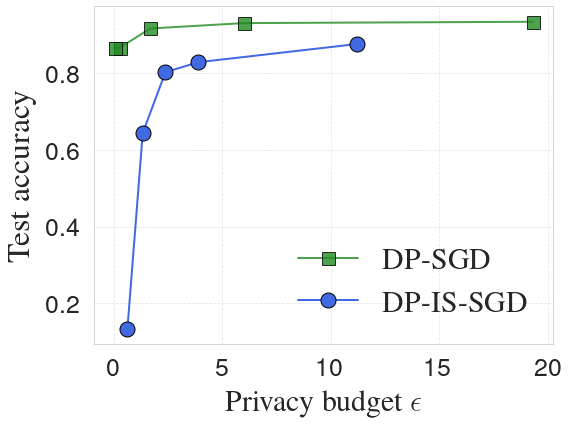

In [109]:
res = joblib.load(f"./data/disparity_{ds_name}.pkl")
eps, weps = res['eps'], res['weps']
tst_disparity = res['tst acc']
tst_disparity_dpiw = res['tst acc dpiw']


ticks_ = [-1, 2, 5, 10, 15, 20]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams.update({
  "text.usetex": True,
  "font.serif" : "times",
  "font.family": "serif"
})

plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

plt.plot(eps, tst_disparity,
                 ls='-',
                 linewidth=2.0,
         alpha=0.8,
                 color ='forestgreen',
                 mec='k',
                 mew=1.0,
                 markersize=13,
                 marker='s',
                 label="DP-SGD")
plt.plot(weps, tst_disparity_dpiw,
                 ls='-',
                 linewidth=2.0,
                 color ='royalblue',
                 mec='k',
                 mew=1.0,
                 markersize=15,
                 marker='o',
                 label="DP-IS-SGD")


#plt.xscale("log")
# plt.xticks(fontsize=fontsize, ticks=[float(10**i) for i in ticks_], labels=[f"$10^{{{eps}}}$" for eps in ticks_[:-1]] + ['SGD'])
plt.yticks(fontsize=fontsize)
plt.grid(axis='x', linestyle='--', linewidth=0.8, alpha=0.5)
plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.5)
plt.xlabel("Privacy budget $\epsilon$", fontsize='30', labelpad=10)
plt.ylabel("Test accuracy", fontsize='32', labelpad=10)
#plt.title(r"$\textbf{DP}$-$\textbf{IS}$-$\textbf{SGD}$ improves disparity", fontsize='32', pad=15)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.legend(fontsize='30', frameon=False)

plt.tight_layout()
plt.savefig(f"figs/disparity_tstacc_{ds_name}.png")
plt.savefig(f"figs/disparity_tstacc_{ds_name}.pdf")


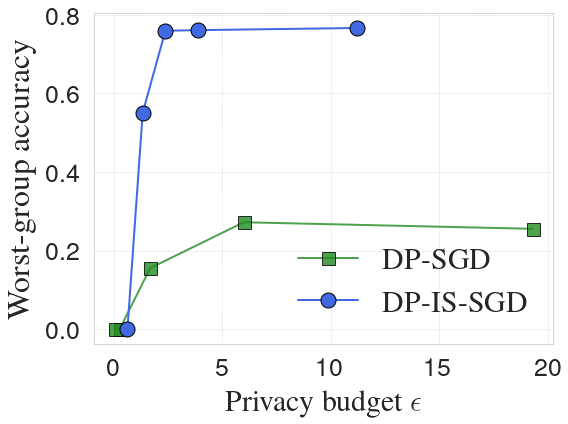

In [110]:
res = joblib.load(f"./data/disparity_{ds_name}.pkl")
eps, weps = res['eps'], res['weps']
tst_disparity = res['tst wg acc']
tst_disparity_dpiw = res['tst wg acc dpiw']


ticks_ = [-1, 2, 5, 10, 15, 20]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams.update({
  "text.usetex": True,
  "font.serif" : "times",
  "font.family": "serif"
})

plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

plt.plot(eps, tst_disparity,
                 ls='-',
                 linewidth=2.0,
         alpha=0.8,
                 color ='forestgreen',
                 mec='k',
                 mew=1.0,
                 markersize=13,
                 marker='s',
                 label="DP-SGD")
plt.plot(weps, tst_disparity_dpiw,
                 ls='-',
                 linewidth=2.0,
                 color ='royalblue',
                 mec='k',
                 mew=1.0,
                 markersize=15,
                 marker='o',
                 label="DP-IS-SGD")


#plt.xscale("log")
# plt.xticks(fontsize=fontsize, ticks=[float(10**i) for i in ticks_], labels=[f"$10^{{{eps}}}$" for eps in ticks_[:-1]] + ['SGD'])
plt.yticks(fontsize=fontsize)
plt.grid(axis='x', linestyle='--', linewidth=0.8, alpha=0.5)
plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.5)
plt.xlabel("Privacy budget $\epsilon$", fontsize='30', labelpad=10)
plt.ylabel("Worst-group accuracy", fontsize='32', labelpad=10)
#plt.title(r"$\textbf{DP}$-$\textbf{IS}$-$\textbf{SGD}$ improves disparity", fontsize='32', pad=15)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.legend(fontsize='30', frameon=False)

plt.tight_layout()
plt.savefig(f"figs/disparity_wgacc_{ds_name}.png")
plt.savefig(f"figs/disparity_wgacc_{ds_name}.pdf")


In [107]:
res = joblib.load(f"./data/disparity_{ds_name}.pkl")
res

{'eps': [9.929539153880084,
  3.7343937429839187,
  0.5258748182496922,
  0.1067248427539888],
 'weps': [11.490623282035546,
  3.9691069389329856,
  2.4150527657875185,
  1.3472536946032567,
  0.6285871815047396],
 'val epoch': [29, 29, 29, 29],
 'val epoch dpiw': [29, 29, 29, 29, 29],
 'tst disparity': [0.715302646160126, 0.8302440494298935, 1.0, 1.0],
 'tst disparity dpiw': [0.14462369680404663,
  0.15380823612213135,
  0.1383289098739624,
  0.3144318461418152,
  0.8349544405937195],
 'tst acc': [0.931319534778595,
  0.9172928333282472,
  0.8667468428611755,
  0.8667468428611755],
 'tst acc dpiw': [0.8767157793045044,
  0.8292756080627441,
  0.8033263087272644,
  0.6442240476608276,
  0.1332531869411468],
 'tst wg acc': [0.2722222208976745, 0.1555555611848831, 0.0, 0.0],
 'tst wg acc dpiw': [0.7666666507720947,
  0.7611111402511597,
  0.7596549391746521,
  0.5512939691543579,
  0.0]}

In [99]:
res = joblib.load(f"./data/disparity_{ds_name}.pkl")
res

{'eps': [5.986238994520431,
  1.6704210664616577,
  0.25916170582883546,
  0.0342371335515071,
  0.015884941591427903],
 'weps': [11.211052000565424,
  3.8919350898153136,
  2.3720271692939545,
  1.3253629702536864,
  0.6194620711495639],
 'val epoch': [29, 29, 29, 29, 29],
 'val epoch dpiw': [29, 29, 29, 29, 29],
 'tst disparity': [0.7208766341209412, 0.8301113098859787, 1.0, 1.0, 1.0],
 'tst disparity dpiw': [0.09117382764816284,
  0.15380823612213135,
  0.1383289098739624,
  0.3144318461418152,
  0.8349544405937195],
 'tst acc': [0.931319534778595,
  0.9172928333282472,
  0.8667468428611755,
  0.8667468428611755,
  0.8667468428611755],
 'tst acc dpiw': [0.8504157662391663,
  0.8292756080627441,
  0.8033263087272644,
  0.6442240476608276,
  0.1332531869411468],
 'tst wg acc': [0.2722222208976745, 0.1555555611848831, 0.0, 0.0, 0.0],
 'tst wg acc dpiw': [0.7777777910232544,
  0.7611111402511597,
  0.7596549391746521,
  0.5512939691543579,
  0.0]}

In [ ]:
# epochs
# sample rate 
# weights
